In [73]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
import math

%config InlineBackend.figure_formats = ['svg']

# Superconducting circuit protected by two-Cooper-pair tunneling

### Have a feeling about what's going on

The potential energy of a $\cos2\varphi$ element is 

\begin{align}
+E_J\cos2\varphi = + \frac{E_J}{2} \sum_{N=-\infty}^{\infty}|N\rangle\langle N+2| + |N+2\rangle\langle N|,
\end{align}

where $E_J$ is the effective tunneling energy of the process. This expression follows the from conjugation relation, $[\varphi, N]=i$, where $N$ is the number of Cooper pairs that have tunneled. The invariance of the potential under translations in $\varphi$ by multiples of $\pi$ implies that half-fluxons are able to traverse the element. Note the + plus sign in front of it.

Now. The total Hamiltonian reads

\begin{align}
H &= 4E_C(N-N_g)^2 - E_J\cos2\varphi,\\
&=4E_C\sum_{N=-\infty}^\infty(N-N_g)^2|N\rangle\langle N| + \frac{E_J}{2} \sum_{N=-\infty}^{\infty} |N\rangle\langle N+2| + |N+2\rangle\langle N|,
\end{align}

where $E_C$ is the charging energy and $N_g$ is the offset charge. 

Since the circuit element only allows *pairs of Cooper pairs to tunnel, the parity of the number of Cooper pairs that have tunneled is preserved under the action of the Hamiltonian. This leads to the ground state to be nearly-doubly degenerate. 

### The Hamiltonian

In [74]:
def hamiltonian(Ec, Ej, N, ng):
    '''
        Hamiltonian for the cos2phi qubit
    '''
    m = np.diag(4 * Ec * (np.arange(-N, N + 1) - ng) ** 2) + 0.5 * Ej * (
        np.diag(np.ones(2 * N - 1), 2) + np.diag(np.ones(2 * N - 1), -2)
    )
    return qt.Qobj(m)

We initialize here the Hamiltonian of a $\cos2\varphi$ qubit. We truncate the Hilbert space dimension to 4. The $E_{2J}/E_C$ ratio is 20. Without loss of generality, the circuit is operated at the charge-offset point $n_g=0$.

In [75]:
N0 = 4
H_2p = hamiltonian(Ec=1, Ej=20, N=N0, ng=0)

eig_val, eig_state = H_2p.eigenstates()

In [76]:
len(eig_val), 2*N0+1

(9, 9)

In [77]:
H_2p

Quantum object: dims=[[9], [9]], shape=(9, 9), type='oper', dtype=Dense, isherm=True
Qobj data =
[[64.  0. 10.  0.  0.  0.  0.  0.  0.]
 [ 0. 36.  0. 10.  0.  0.  0.  0.  0.]
 [10.  0. 16.  0. 10.  0.  0.  0.  0.]
 [ 0. 10.  0.  4.  0. 10.  0.  0.  0.]
 [ 0.  0. 10.  0.  0.  0. 10.  0.  0.]
 [ 0.  0.  0. 10.  0.  4.  0. 10.  0.]
 [ 0.  0.  0.  0. 10.  0. 16.  0. 10.]
 [ 0.  0.  0.  0.  0. 10.  0. 36.  0.]
 [ 0.  0.  0.  0.  0.  0. 10.  0. 64.]]

### Visualizing the number ladder

$|g\rangle$ and $|e\rangle$ are the two nearly degenerate ground state of the Hamiltonian. They are supported on *only* even and odd number states, respectively.

In [78]:
g = eig_state[0]

g

Quantum object: dims=[[9], [1]], shape=(9, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.05050891]
 [ 0.        ]
 [-0.36673981]
 [ 0.        ]
 [ 0.85199854]
 [ 0.        ]
 [-0.36673981]
 [ 0.        ]
 [ 0.05050891]]

In [79]:
e = eig_state[1]

e

Quantum object: dims=[[9], [1]], shape=(9, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.        ]
 [ 0.15583604]
 [ 0.        ]
 [-0.68972105]
 [ 0.        ]
 [ 0.68972105]
 [ 0.        ]
 [-0.15583604]
 [ 0.        ]]

We choose them to be the two logical states of the qubit. To visualize how these two are supported on different parity subspaces, let's plot the coefficients.

In [80]:
def extract_coefficients(eig_state, N0, state_idx):
    '''
        Extract the coefficients (float)
    '''
    return np.array([np.real(eig_state[state_idx][i][0]) for i in range(2 * N0 + 1)])

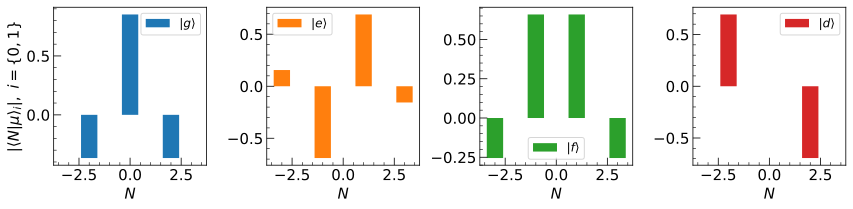

In [81]:
# For a truncated Hilbert space of dimension 2N_0+1, the number of charge on a superconducting island goes from -N_0 to N_0
range_N = np.arange(-N0, N0+1)

coefficients = [
    extract_coefficients(eig_state, N0, i) for i in range(4)
]

shrink = 1
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
labels = [r'$|g\rangle$', r'$|e\rangle$', r'$|f\rangle$', r'$|d\rangle$']

fig, axes = plt.subplots(ncols=4, figsize=(12, 3))

for ax, coef, color, label in zip(axes, coefficients, colors, labels):
    ax.bar(range_N[shrink:-shrink], coef[shrink:-shrink], color=color, label=label)
    ax.set_xlabel(r'$N$', fontsize=15)
    ax.tick_params(axis='both', labelsize=15, direction='in', which='both')
    ax.minorticks_on()
    ax.tick_params(axis='both', which='major', length=7.5)
    ax.tick_params(axis='both', which='minor', length=3)
    ax.legend(fontsize=12)

axes[0].set_ylabel(r'$|\langle N|\mu\rangle_i|,\ i=\{0,1\}$', fontsize=15)

fig.tight_layout()

### Nearly degenerate ground energies

In [82]:
eig_val[0], eig_val[1]

(np.float64(-8.6089305051607), np.float64(-8.25940669922597))

Indeed, they are very close to each other. Let us actually look at the structure of the first 6 eigenenergies (adjust `ylim` to see others).

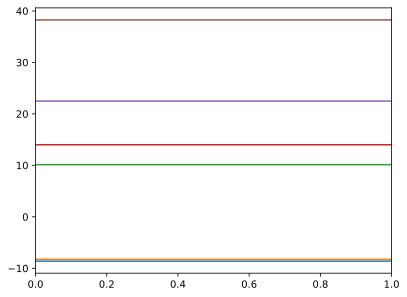

In [83]:
for i in range(6):
    plt.axhline(eig_val[i], label=f'{i}', color=colors[i])

# plt.ylim([-10, -])

In the Smith2020 paper, the states $|g\rangle$ and $|e\rangle$ are also called $|+\rangle$ and $|-\rangle$. They do not overlap in charge space (as seen above) and equivalently will have opposite periodicity in phase space (see below). This unique property predicts that for any sufficiently local operator $\mathcal{O}$, we have $\langle -|\mathcal{O}|+\rangle$. 

*We're gonna see later what these $\mathcal{O}$ operators are.

Furthermore, the states $|\circlearrowleft/\circlearrowright\rangle=\frac{1}{\sqrt{2}}(|+\rangle\pm|-\rangle)$ are, respectively, localized near $-\pi/2$ and $\pi/2$. Let's now elucidate these concepts.

### Visualizing the states in the phase basis $|\varphi\rangle$

What we have from the diagonalization is

\begin{align}
|\psi\rangle = \sum_{N} \langle N|\psi\rangle |N\rangle.
\end{align}

Because the system has one DoF being continuous (superconducting phase) and one being discrete (number of Cooper pairs on a superconducting island), it is a rotor. The commutation relation is $[\varphi, N]=i$. We have the following identity,

\begin{align}
\langle \varphi | N \rangle = e^{iN\varphi}.
\end{align}

Now, the wavefunction of interest is 
\begin{align}
\langle \varphi | \psi \rangle &= \langle \varphi | \left(\sum_{N=-N_0}^{N_0} \langle N|\psi\rangle |N\rangle\right),\\
&=\sum_{N=-N_0}^{N_0} \langle N|\psi\rangle \langle \varphi | N\rangle,\\
&=\frac{1}{\sqrt{2\pi}}\sum_{N,N'}e^{i\varphi N'}\langle N' |N\rangle \langle N|\psi\rangle,\\
&=\frac{1}{\sqrt{2\pi}}\sum_{N}e^{i\varphi N}\langle N|\psi\rangle.
\end{align}

In [84]:
def compute_wavefunction_amplitudes(coef, phi_basis_labels, phi_grid_pts):
    return np.array([
        (1 / math.sqrt(2 * np.pi)) * np.sum(
            coef * np.exp(1j * phi_basis_labels[k] * range_N)
        ) for k in range(phi_grid_pts)
    ])

In [85]:
phi_grid_pts = 100
phi_basis_labels = np.linspace(-np.pi, np.pi, phi_grid_pts)

phi_wavefunc_amplitudes = [
    np.empty(phi_grid_pts, dtype=np.complex128) for _ in range(len(coefficients))
]

for i, coef in enumerate(coefficients):
    phi_wavefunc_amplitudes[i] = compute_wavefunction_amplitudes(coef, phi_basis_labels, phi_grid_pts)

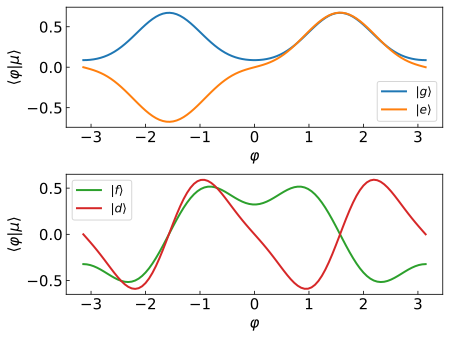

In [86]:
fig, axes = plt.subplots(nrows=2)

axes[0].plot(phi_basis_labels, np.real(phi_wavefunc_amplitudes[0]), label=r'$|g\rangle$', color=colors[0], linewidth=2.0)
axes[0].plot(phi_basis_labels, np.imag(phi_wavefunc_amplitudes[1]), label=r'$|e\rangle$', color=colors[1], linewidth=2.0)

axes[1].plot(phi_basis_labels, np.real(phi_wavefunc_amplitudes[2]), label=r'$|f\rangle$', color=colors[2], linewidth=2.0)
axes[1].plot(phi_basis_labels, np.imag(phi_wavefunc_amplitudes[3]), label=r'$|d\rangle$', color=colors[3], linewidth=2.0)

for ax in axes:
    ax.set_xlabel(r'$\varphi$', fontsize=15)
    ax.set_ylabel(r'$\langle\varphi|\mu\rangle$', fontsize=15)
    ax.tick_params(axis='both', labelsize=15, direction='in', which='both')
    ax.legend(fontsize=12)

fig.tight_layout()

We see that in this case, the wavefunctions are localized near $\phi=-\pi/2,\pi/2$, resulting in a nearly degenerate harmonic level arrangement. We now look at the two specific states that we mentioned above, $|\circlearrowright/\circlearrowleft\rangle=\frac{1}{\sqrt{2}}(|+\rangle\pm|-\rangle)$.

In [87]:
ca_countercw = (1/np.sqrt(2))*(phi_wavefunc_amplitudes[0]+1j*phi_wavefunc_amplitudes[1])
ca_counterctw = (1/np.sqrt(2))*(phi_wavefunc_amplitudes[0]-1j*phi_wavefunc_amplitudes[1])

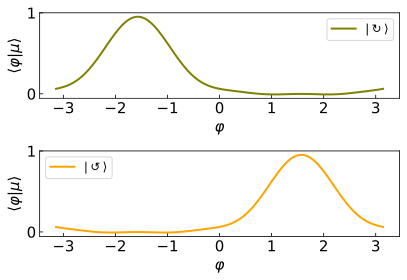

In [88]:
fig, axes = plt.subplots(nrows=2, figsize=(6, 4))

axes[0].plot(phi_basis_labels, np.real(ca_countercw), label=r'$|\circlearrowright\rangle$', color='olive', linewidth=2.0)
axes[1].plot(phi_basis_labels, np.real(ca_counterctw), label=r'$|\circlearrowleft\rangle$', color='orange', linewidth=2.0)

for ax in axes:
    ax.set_xlabel(r'$\varphi$', fontsize=15)
    ax.set_ylabel(r'$\langle\varphi|\mu\rangle$', fontsize=15)
    ax.tick_params(axis='both', labelsize=15, direction='in', which='both')
    ax.legend(fontsize=12)

fig.tight_layout()

*Very cool, huh! These two states have suppresed overlap in phase space for large $E_J/E_C$. We could check this later if time permits. Right now, note that the $E_J/E_C$ value is 20.

### Check for the convergence of the Hilbert space

List of dimensions that we're gonna check

In [89]:
n_dimensions = [6, 7, 8, 9, 10, 11]

n_dimensions

[6, 7, 8, 9, 10, 11]

In [90]:
def qobj2np(state):
    ''' 
        Convert a Qobj state to a numpy array.
        Note: Fock coefficients assumed to be real.
    '''
    dim = state.shape[0]
    arr = []
    for d in range(dim):
        arr.append(np.real(state[d][0]))
    return np.array(arr)

In [91]:
def dilate(state_s, state_l):
    '''
        Dilate a state of dimension s to dimension l
    '''
    ns = state_s.shape[0]
    nl = state_l.shape[0]

    num_zeros = int((nl - ns)/2)

    state_s = qobj2np(state_s)

    dilated_state_s = np.array([0.0] * num_zeros + list(state_s) + [0.0] * num_zeros, dtype=float)
    
    return qt.Qobj(dilated_state_s)

In [92]:
H0 = hamiltonian(Ec=1, Ej=20, N=n_dimensions[0], ng=0)

_, eign_state_d0 = H0.eigenstates()

print(eign_state_d0[-1].shape)

H1 = hamiltonian(Ec=1, Ej=20, N=n_dimensions[1], ng=0)

_, eign_state_d1 = H1.eigenstates()

print(eign_state_d1[-1].shape)

(13, 1)
(15, 1)


In [93]:
def vis_n(state):
    ''' 
        Plot number distribution of a cos2phi state
    '''
    N0 = int((state.shape[0]-1)/2)
    range_N = np.arange(-N0, N0+1)
    coef = qobj2np(state)
    plt.bar(range_N, coef, color='olive')

In [94]:
def calculate_fidelities(n_dimensions, idx_state):
    fidelities = []
    eigprev = None

    for d in n_dimensions:
        if d == n_dimensions[0]:
            Hprev = hamiltonian(Ec=1, Ej=50, N=d, ng=0)
            _, eigprev = Hprev.eigenstates()
            continue

        Hnew = hamiltonian(Ec=1, Ej=50, N=d, ng=0)
        _, eignew = Hnew.eigenstates()

        fidelity = qt.fidelity(dilate(eigprev[idx_state], eignew[idx_state]), eignew[idx_state])
        fidelities.append(min(fidelity, 1.0))
        eigprev = eignew

    return fidelities

In [95]:
fid_list = []

for i in range(6):
    fid_list.append(calculate_fidelities(n_dimensions, idx_state=i))

fid_list = np.array(fid_list)

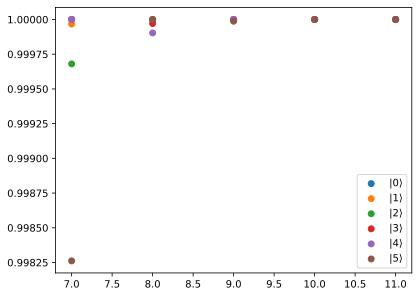

In [96]:
for i in range(6):
    plt.scatter(n_dimensions[1:], fid_list[i], label=rf'$|{i}\rangle$')

plt.legend()

## Decoherence estimate

We now consider a logical qubit formed by $|g\rangle$ and $|e\rangle$ states. These are now our logical $|\bar{0}\rangle$ and $|\bar{1}\rangle$. We try to elucidate which types of operators can and cannot induce transitions between the two states of the qubit.

Before going any further, we see that there's two operators that we need to think about. The first operator being Cooper-pair number operator $\hat{N}$. This operator is easily represented in the charge basis,
\begin{align}
\hat{N} = \sum_{N=-\infty}^{\infty} N|N\rangle\langle N|.
\end{align}
Representing the other one, superconducting phase operator $\hat{\varphi}$, in the charge basis is of a much more daunting task. We have several options. Let's explore them individually.

### Taking the logarithm

First, since we know how to represent $e^{i\hat\varphi}=\sum_{N}|N+1\rangle\langle N|$, we hope that we can actually find
\begin{align}
\log[e^{i\hat{\varphi}}] = \log[\sum_{-\infty}^{\infty}|N+1\rangle\langle N|]\rightarrow \hat{\varphi}=\frac{1}{i}\log[\sum_{-\infty}^{\infty}|N+1\rangle\langle N|]=\frac{1}{i}\log{M}.
\end{align}
The logarithm of the matrix ${M}=\sum_{-\infty}^{\infty}|N+1\rangle\langle N|$ actually can be found as follow. Assume that we can diagonalize it. Then let $D$ is the diagonal matrix,
\begin{align}
D = U^\dagger M U,\\
M = U D U^\dagger.
\end{align}
Hence,
\begin{align}
\log(M) &= \log(U D U^\dagger),\\
&=U \log(D) U^\dagger
\end{align}

In [97]:
M = np.diag(np.ones(2 * 6 - 1), -1)

eig_vals, eig_vecs = np.linalg.eig(M)

eig_vals

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [98]:
M

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

This matrix is however not diagonalizable...

Perhaps it is because it's not really physical to have this sort of matrix? How about we imposing some periodic boundary conditions, like for example, for the last element of the sum, we actually translate the charge number back to the minimum number, that is 
\begin{align}
|N_{max}+1\rangle\langle N|\to |N_{min}\rangle\langle N_{max}+1|
\end{align}

In [99]:
M = np.diag(np.ones(2 * 6 - 1), -1)
M[0][-1] = 1

M

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

So that now, when we have a state representing there are $N_{max}$ Cooper pairs on the superconducting island...

In [100]:
my_vec = np.zeros(M.shape[0])
my_vec[-1] = 1

my_vec

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

Applying this operator will map to the state having $-N_{max}$ Cooper pairs...

In [101]:
M@my_vec

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

The new $M$ matrix is now diagonalizable. We diagonalize it.

In [102]:
eig_vals, eig_vecs = np.linalg.eig(M)

eig_vals

array([-1.00000000e+00+0.j       , -8.66025404e-01+0.5j      ,
       -8.66025404e-01-0.5j      , -5.00000000e-01+0.8660254j,
       -5.00000000e-01-0.8660254j, -1.11022302e-16+1.j       ,
       -1.11022302e-16-1.j       ,  5.00000000e-01+0.8660254j,
        5.00000000e-01-0.8660254j,  1.00000000e+00+0.j       ,
        8.66025404e-01+0.5j      ,  8.66025404e-01-0.5j      ])

We obtain the diagonal matrix $D$.

In [103]:
D = np.diag(eig_vals)

As a sanity check, we can use the eigenvectors of $M$ to find $D$.

In [104]:
Udagger = np.linalg.inv(eig_vecs)
U = eig_vecs

diagonalized_M = Udagger @ M @ U 

In [105]:
for i in range(D.shape[0]):
    print(D[i][i], np.round(diagonalized_M, 10)[i][i])

(-1.0000000000000009+0j) (-1-0j)
(-0.8660254037844397+0.5000000000000001j) (-0.8660254038+0.5j)
(-0.8660254037844397-0.5000000000000001j) (-0.8660254038-0.5j)
(-0.49999999999999983+0.8660254037844395j) (-0.5+0.8660254038j)
(-0.49999999999999983-0.8660254037844395j) (-0.5-0.8660254038j)
(-1.1102230246251565e-16+0.9999999999999996j) 1j
(-1.1102230246251565e-16-0.9999999999999996j) -1j
(0.5000000000000002+0.8660254037844392j) (0.5+0.8660254038j)
(0.5000000000000002-0.8660254037844392j) (0.5-0.8660254038j)
(0.9999999999999993+0j) (1+0j)
(0.8660254037844389+0.5000000000000002j) (0.8660254038+0.5j)
(0.8660254037844389-0.5000000000000002j) (0.8660254038-0.5j)


Bon. Now we calculate $\log M$.

In [106]:
logD = np.diag(np.log(eig_vals))
log_M = U @ logD @ Udagger

log_M

array([[-1.90364976e-16+0.26179939j, -9.77048617e-01-0.26179939j,
         4.53449841e-01+0.26179939j, -2.61799388e-01-0.26179939j,
         1.51149947e-01+0.26179939j, -7.01489345e-02-0.26179939j,
        -1.38777878e-15+0.26179939j,  7.01489345e-02-0.26179939j,
        -1.51149947e-01+0.26179939j,  2.61799388e-01-0.26179939j,
        -4.53449841e-01+0.26179939j,  9.77048617e-01-0.26179939j],
       [ 9.77048617e-01-0.26179939j,  1.11022302e-15+0.26179939j,
        -9.77048617e-01-0.26179939j,  4.53449841e-01+0.26179939j,
        -2.61799388e-01-0.26179939j,  1.51149947e-01+0.26179939j,
        -7.01489345e-02-0.26179939j, -6.38378239e-16+0.26179939j,
         7.01489345e-02-0.26179939j, -1.51149947e-01+0.26179939j,
         2.61799388e-01-0.26179939j, -4.53449841e-01+0.26179939j],
       [-4.53449841e-01+0.26179939j,  9.77048617e-01-0.26179939j,
         2.10942375e-15+0.26179939j, -9.77048617e-01-0.26179939j,
         4.53449841e-01+0.26179939j, -2.61799388e-01-0.26179939j,
        

From $\log M$, we find the representation of $\varphi$ in charge basis.

In [107]:
phi_charge_basis = -1j*log_M

phi_charge_basis

array([[ 0.26179939+1.90364976e-16j, -0.26179939+9.77048617e-01j,
         0.26179939-4.53449841e-01j, -0.26179939+2.61799388e-01j,
         0.26179939-1.51149947e-01j, -0.26179939+7.01489345e-02j,
         0.26179939+1.38777878e-15j, -0.26179939-7.01489345e-02j,
         0.26179939+1.51149947e-01j, -0.26179939-2.61799388e-01j,
         0.26179939+4.53449841e-01j, -0.26179939-9.77048617e-01j],
       [-0.26179939-9.77048617e-01j,  0.26179939-1.11022302e-15j,
        -0.26179939+9.77048617e-01j,  0.26179939-4.53449841e-01j,
        -0.26179939+2.61799388e-01j,  0.26179939-1.51149947e-01j,
        -0.26179939+7.01489345e-02j,  0.26179939+6.38378239e-16j,
        -0.26179939-7.01489345e-02j,  0.26179939+1.51149947e-01j,
        -0.26179939-2.61799388e-01j,  0.26179939+4.53449841e-01j],
       [ 0.26179939+4.53449841e-01j, -0.26179939-9.77048617e-01j,
         0.26179939-2.10942375e-15j, -0.26179939+9.77048617e-01j,
         0.26179939-4.53449841e-01j, -0.26179939+2.61799388e-01j,
        

Is this true? How can we falsify it? We can use this $\varphi$ operator, put it back to the original Hamiltonian and see if the eigenstates and eigenvalues are the same as before.

### Reconstruct the Hamiltonian in the charge basis

In [108]:
def build_H_c(Ec, N, ng):
    m = np.diag(4 * Ec * (np.arange(-N, N + 1) - ng) ** 2)
    return qt.Qobj(m)

In [109]:
N0 = 4
    
M = np.diag(np.ones(2 * N0), -1)
M[0][-1] = 1

eig_vals, eig_vecs = np.linalg.eig(M)
Udagger = np.linalg.inv(eig_vecs)
U = eig_vecs
logD = np.diag(np.log(eig_vals))
log_M = U @ logD @ Udagger
phi_charge_basis = -1j*log_M
phi_charge_basis = qt.Qobj(phi_charge_basis)
H_j = 20 * (2*phi_charge_basis).cosm()
H_c = build_H_c(Ec=1, N=N0, ng=0)
H_rcs = H_c+H_j
_, rcs_eig_state = H_rcs.eigenstates()

In [110]:
rcs_coefficients

[array([ 1.05703252e-18, -3.16512998e-17,  2.21311159e-18, -1.76306546e-17,
        -2.32655629e-18, -2.12413315e-18,  1.13760569e-18,  3.11586118e-17,
         1.30325106e-18, -3.61645699e-17, -1.21527504e-16,  1.82615997e-17,
         1.94365315e-14,  4.03042836e-17, -2.53617979e-12, -1.14688607e-16,
         2.61865645e-10,  6.68563629e-17, -2.07532236e-08,  1.66057947e-16,
         1.21299714e-06,  5.33252147e-16, -4.95438037e-05, -3.89581287e-16,
         1.30977705e-03, -1.71687575e-15, -1.99392668e-02,  2.57734601e-14,
         1.43473852e-01, -1.12306071e-13, -3.33183074e-01,  1.14186287e-13,
         1.43473852e-01, -2.75644225e-14, -1.99392668e-02,  2.74684469e-15,
         1.30977705e-03, -2.78295424e-17, -4.95438037e-05,  1.14374365e-16,
         1.21299714e-06, -9.31242146e-17, -2.07532236e-08, -4.66411976e-17,
         2.61865208e-10,  5.24549721e-17, -2.53613875e-12,  1.80016711e-16,
         1.94409190e-14, -3.36364326e-17, -1.23001217e-16, -1.32838817e-18,
        -5.7

In [111]:
coefficients

[array([ 0.05050891,  0.        , -0.36673981,  0.        ,  0.85199854,
         0.        , -0.36673981,  0.        ,  0.05050891]),
 array([ 0.        ,  0.15583604,  0.        , -0.68972105,  0.        ,
         0.68972105,  0.        , -0.15583604,  0.        ]),
 array([ 0.        , -0.25498036,  0.        ,  0.65953394,  0.        ,
         0.65953394,  0.        , -0.25498036,  0.        ]),
 array([-1.38675049e-01,  0.00000000e+00,  6.93375245e-01,  0.00000000e+00,
        -4.77276720e-15,  0.00000000e+00, -6.93375245e-01,  0.00000000e+00,
         1.38675049e-01])]

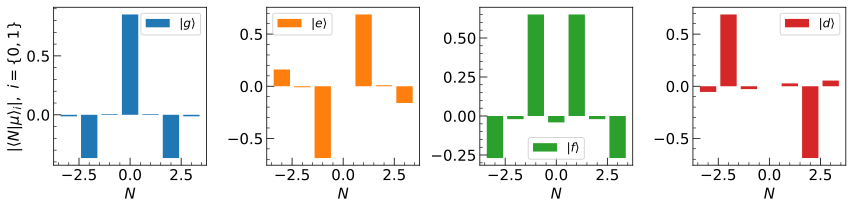

In [112]:
rcs_coefficients = [
    extract_coefficients(rcs_eig_state, N0, i) for i in range(4)
]

fig, axes = plt.subplots(ncols=4, figsize=(12, 3))

for ax, coef, color, label in zip(axes, rcs_coefficients, colors, labels):
    ax.bar(range_N[shrink:-shrink], coef[shrink:-shrink], color=color, label=label)
    ax.set_xlabel(r'$N$', fontsize=15)
    ax.tick_params(axis='both', labelsize=15, direction='in', which='both')
    ax.minorticks_on()
    ax.tick_params(axis='both', which='major', length=7.5)
    ax.tick_params(axis='both', which='minor', length=3)
    ax.legend(fontsize=12)

axes[0].set_ylabel(r'$|\langle N|\mu\rangle_i|,\ i=\{0,1\}$', fontsize=15)

fig.tight_layout()

In [113]:
phi_wavefunc_amplitudes_rcs = [
    np.empty(phi_grid_pts, dtype=np.complex128) for _ in range(len(coefficients))
]

for i, coef in enumerate(rcs_coefficients):
    phi_wavefunc_amplitudes_rcs[i] = compute_wavefunction_amplitudes(coef, phi_basis_labels, phi_grid_pts)

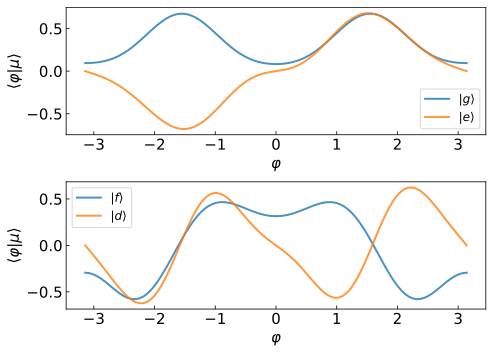

In [114]:
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))

axes[0].plot(phi_basis_labels, np.real(phi_wavefunc_amplitudes_rcs[0]), label=r'$|g\rangle$', linewidth=2.0, alpha=0.8)
axes[0].plot(phi_basis_labels, np.imag(phi_wavefunc_amplitudes_rcs[1]), label=r'$|e\rangle$', linewidth=2.0, alpha=0.8)

axes[1].plot(phi_basis_labels, np.real(phi_wavefunc_amplitudes_rcs[2]), label=r'$|f\rangle$', linewidth=2.0, alpha=0.8)
axes[1].plot(phi_basis_labels, np.imag(phi_wavefunc_amplitudes_rcs[3]), label=r'$|d\rangle$', linewidth=2.0, alpha=0.8)

for ax in axes:
    ax.set_xlabel(r'$\varphi$', fontsize=15)
    ax.set_ylabel(r'$\langle\varphi|\mu\rangle$', fontsize=15)
    ax.tick_params(axis='both', labelsize=15, direction='in', which='both')
    ax.legend(fontsize=12)

fig.tight_layout()

Cool. They look the same. Just out of curiosity. $\varphi$ is a an observable, therefore it's Hermitian. What are the eigenstates of $\varphi$?

In [115]:
phi_val, phi_state = phi_charge_basis.eigenstates()

phi_val

array([-2.79252680e+00, -2.09439510e+00, -1.39626340e+00, -6.98131701e-01,
       -2.22044605e-15,  6.98131701e-01,  1.39626340e+00,  2.09439510e+00,
        2.79252680e+00])

We can get a hint by looking at the first eigenvalue...

In [116]:
phi_state[0].dag()*phi_charge_basis*phi_state[0]

(-2.7925268031909285-1.3672795516217167e-15j)

Extract them, and plot on a plane

In [117]:
coef_phi_state = []
for i in range(phi_state[0].shape[0]):
    coef_phi_state.append(np.exp(1j*i*phi_val[0]))
coef_phi_state = np.array(coef_phi_state)
coef_phi_state = (1/np.sqrt(2*np.pi))*coef_phi_state

In [118]:
real_part = []
imag_part = []
for i in range(phi_state.shape[0]):
    real_part.append(np.real((phi_charge_basis*phi_state[0])[i][0]))
    imag_part.append(np.imag((phi_charge_basis*phi_state[0])[i][0]))

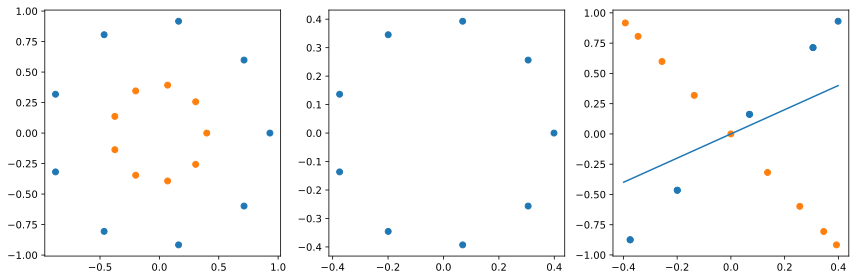

In [119]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))

axes[0].scatter(real_part, imag_part)
axes[0].scatter(np.real(coef_phi_state), np.imag(coef_phi_state))
axes[1].scatter(np.real(coef_phi_state), np.imag(coef_phi_state))
axes[2].scatter(np.real(coef_phi_state), real_part)
axes[2].scatter(np.imag(coef_phi_state), imag_part)
axes[2].plot(np.linspace(-1/np.sqrt(np.pi*2), 1/np.sqrt(np.pi*2), 100), np.linspace(-1/np.sqrt(np.pi*2), 1/np.sqrt(2*np.pi), 100))

fig.tight_layout()

They form a circle! Indeed, the "eigenstate" of $\varphi$ has a nice analytical form, called the phase state. In the number basis,

\begin{align}
|\varphi\rangle = \dfrac{1}{\sqrt{2\pi}}\sum_{n=0}^{\infty}e^{in\varphi}|N\rangle
\end{align}

Below is the comparison of the eigenvalues of reconstructed $\varphi$ versus a "real" $\varphi$.

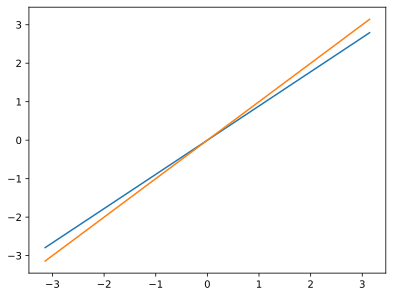

In [120]:
plt.plot(np.linspace(-np.pi, np.pi, 2*N0+1), phi_val)
plt.plot(np.linspace(-np.pi, np.pi, 2*N0+1), np.linspace(-np.pi, np.pi, 2*N0+1))

### Using Fourier decomposition

Another idea is to use the Fourier decomposition of $\varphi$. The function is assumed to be periodic over $-\pi$ to $\pi$.

In [121]:
def fourier_series(x, terms):
    """Compute the Fourier series of f(x) = x with a given number of terms."""
    f_approx = np.zeros_like(x)
    for n in range(1, terms + 1):
        bn = 2 * (-1)**(n + 1) / n 
        f_approx += bn * np.sin(n * x)
    return f_approx

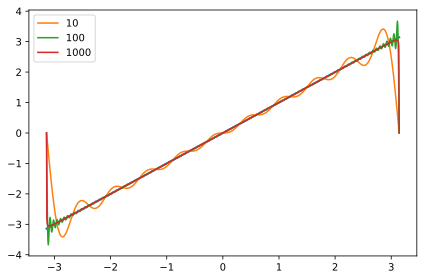

In [122]:
x = np.linspace(-np.pi, np.pi, 1000) 
f_original = x 
terms_list = [10, 100, 1000] 
approximations = [fourier_series(x, terms) for terms in terms_list]

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, f_original, linewidth=2)

for terms, f_approx in zip(terms_list, approximations):
    ax.plot(x, f_approx, label=f'{terms}')

ax.legend()
fig.tight_layout()

This suggests we write the functional operator $f(\hat{\varphi})=\varphi$ on the interval $[-\pi,\pi]$ as
\begin{align}
\hat{\varphi}=\sum_{n=1}^\infty \frac{2(-1)^{n+1}}{n}\sin\left(n\hat{\varphi}\right)
\end{align}
Since we know how to write $\sin\left({n\hat{\varphi}}\right)$ in the charge basis, we can actually compute this sum:
\begin{align}
\sin\left({n\hat{\varphi}}\right)&=\frac{1}{2i}\left[\exp\left(i n\hat{\varphi}\right)-\exp\left(-i n\hat{\varphi}\right)\right],\\
&=\frac{1}{2i}\sum_{N=-\infty}^{\infty}|N+n\rangle\langle N|-|N\rangle\langle N+n|
\end{align}
Let's try to implement this...

In [123]:
def sin_op(n, N0):
    size = 2 * N0 - 1
    m = np.zeros((size, size), dtype=complex) 
    
    if n <= size:  
        diag_vals = (1 / (2 * 1j))
        np.fill_diagonal(m[n:], diag_vals)      
        np.fill_diagonal(m[:, n:], -diag_vals)  
    
    else:
        print("Warning: n > mat_size")
        
    return m

def cos_op(n, N0):
    size = 2 * N0 - 1
    m = np.zeros((size,size), dtype=complex)

    if n < size:
        diag_vals = (1/2)
        np.fill_diagonal(m[n:], diag_vals)
        np.fill_diagonal(m[:, n:], diag_vals)
    
    if n >= size:
        print("Warning: n >= mat_size")
    
    return m

def coef_fourier(n):
    return (2 * (-1) ** (n + 1) / n)

In [124]:
N0 = 500
mat_size = 2 * N0 - 1
varphi = np.zeros((mat_size, mat_size), dtype=complex)
coefs = []
num_terms = 999
for n in range(1, num_terms+1):  
    coefs.append(coef_fourier(n))
    varphi += coef_fourier(n) * sin_op(n, N0)
    
varphi = qt.Qobj(varphi)

We obtain the varphi...

In [125]:
varphi

Quantum object: dims=[[999], [999]], shape=(999, 999), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.+0.j         0.+1.j         0.-0.5j        ... 0.-0.00100402j
  0.+0.00100301j 0.-0.001002j  ]
 [0.-1.j         0.+0.j         0.+1.j         ... 0.+0.00100503j
  0.-0.00100402j 0.+0.00100301j]
 [0.+0.5j        0.-1.j         0.+0.j         ... 0.-0.00100604j
  0.+0.00100503j 0.-0.00100402j]
 ...
 [0.+0.00100402j 0.-0.00100503j 0.+0.00100604j ... 0.+0.j
  0.+1.j         0.-0.5j       ]
 [0.-0.00100301j 0.+0.00100402j 0.-0.00100503j ... 0.-1.j
  0.+0.j         0.+1.j        ]
 [0.+0.001002j   0.-0.00100301j 0.+0.00100402j ... 0.+0.5j
  0.-1.j         0.+0.j        ]]

The number of coefs needed actually decreases very slow. We see below, up until 1000 terms, the coefficents are still on the order of $10^{-3}$. It means that we need to include a very large number of terms for the approximation to be acceptable.

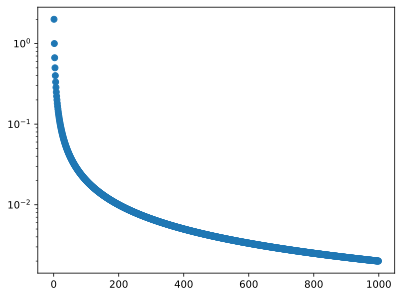

In [126]:
plt.scatter(range(1, num_terms+1), np.abs(coefs))
plt.yscale('log')

Let's try to calculate to $\cos$ of this $\varphi$.

In [127]:
mord_cos2p = (2*varphi).cosm()

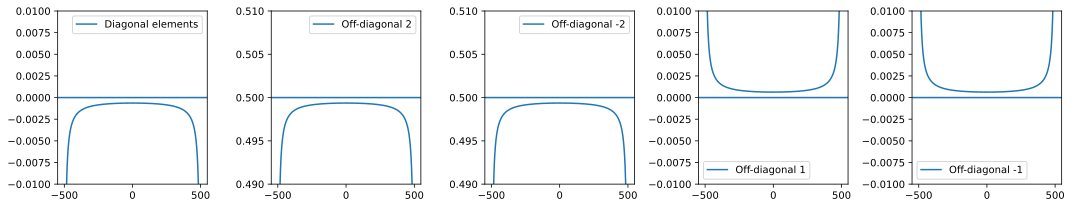

In [128]:
fig, axes = plt.subplots(ncols=5, figsize=(15, 3))

axes[0].plot(np.arange(-(N0-1), N0, 1), np.real(np.diagonal(mord_cos2p.full())), label='Diagonal elements')
axes[1].plot(np.arange(-(N0-2), (N0-1), 1), np.real(np.diagonal(mord_cos2p.full(), offset=2)), label='Off-diagonal 2')
axes[2].plot(np.arange(-(N0-2), (N0-1), 1), np.real(np.diagonal(mord_cos2p.full(), offset=-2)), label='Off-diagonal -2')
axes[3].plot(np.arange(-N0+1, N0-1, 1), np.real(np.diagonal(mord_cos2p.full(), offset=1)), label='Off-diagonal 1')
axes[4].plot(np.arange(-N0+1, N0-1, 1), np.real(np.diagonal(mord_cos2p.full(), offset=-1)), label='Off-diagonal -1')

for i in range(5):
    axes[i].legend()
    if i == 0 or i == 3 or i == 4:
        axes[i].set_ylim([-0.01, 0.01])
        axes[i].axhline(0)
    if i == 1 or i == 2:
        axes[i].set_ylim([0.49, 0.51])
        axes[i].axhline(0.5)

fig.tight_layout()

A feature of the $\cos2\varphi$ potential is that the diagonal elements should be zero. Here, we see that in the "middle" of the matrix, the diagonal elements are bounded below. They cannot reach zero. Another feature is that the 2nd off-diagonal elements should tend to 0.5, but here we see that they're also bounded above. From these 3 graphs, we conclude that the approximation is quite bad, and the $\log$ method should be favored instead.